In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [27]:
img=cv2.imread("lena.jpg")
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
h,w=img.shape[:2]

In [28]:
#最大类间方差法
def otsu(img):
    max=-1
    threshold=0
    img_otsu=np.zeros((h,w))
    for i in range(256):
        img1=img[np.where(img<i)]
        img2=img[np.where(img>=i)]
        mean_img1=np.mean(img1)
        mean_img2=np.mean(img2)
        flag=(len(img1)/(h*w))*(len(img2)/(h*w))*(mean_img2-mean_img1)**2
        if flag>max:
            max=flag
            threshold=i
    img_otsu[img<threshold]=0
    img_otsu[img>=threshold]=255
    return img_otsu

In [29]:
#迭代阈值分割
def iter_separation(img):
    mean_v=img.mean()
    while(True):
        img1=img[img<mean_v].mean()
        img2=img[img>=mean_v].mean()
        threshold=(img1+img2)/2
        if abs(mean_v-threshold)<1:
            break
        mean_v=threshold
    return int(mean_v)

d:\professional\python\anaconda\envs\learn\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
d:\professional\python\anaconda\envs\learn\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


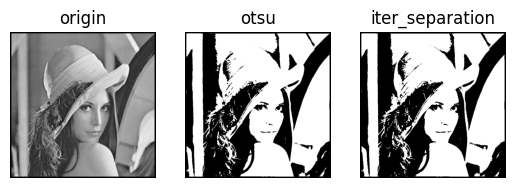

In [30]:
th,img_op=cv2.threshold(img,iter_separation(img),255,0)
img_otsu=otsu(img)
plt.subplot(131),plt.imshow(img,"gray"),plt.title("origin"),plt.axis("off")
plt.subplot(132),plt.imshow(img_otsu,"gray"),plt.title("otsu"),plt.axis("off")
plt.subplot(133),plt.imshow(img_op,"gray"),plt.title("iter_separation"),plt.axis("off")
plt.show()